In [3]:
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
synth_data = pd.read_csv('synth_table_with_rmsedist_10_28_24.csv')

In [8]:
synth_data

,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,ethanol_dilute_vol,sample_dilute_vol,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,rmse_log_distance
0,4fd21940-a331-4524-b730-cf76de1b4d8d,50.000000,124.000000,165.000000,1361.000000,0.362682,7.951422,0.009674,NaN,NaN,1700.0,0.029412,0.072941,0.097059,0.800588,NaN
1,8933d4b1-8929-4b58-a491-a0c55df30fed,83.000000,58.000000,175.000000,1384.000000,0.218193,13.216927,0.016085,NaN,NaN,1700.0,0.048824,0.034118,0.102941,0.814118,NaN
2,130093e4-2947-4d37-b73a-ed4c23442ab8,20.000000,64.000000,49.000000,1567.000000,0.903794,3.190814,0.003982,NaN,NaN,1700.0,0.011765,0.037647,0.028824,0.921765,0.701481
3,a3f7d49b-cc77-4468-aae0-ad451027ddc0,181.000000,9.000000,228.000000,1283.000000,0.100743,28.625618,0.034357,NaN,NaN,1701.0,0.106408,0.005291,0.134039,0.754262,50.000000
4,f69628da-ff56-4f3a-ba2e-816036b87557,100.000000,52.000000,15.000000,1534.000000,0.182971,15.761151,0.019630,NaN,NaN,1701.0,0.058789,0.030570,0.008818,0.901822,0.523673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,49908a7b-72dd-4050-aab5-05b2807f82f8,60.410553,94.258186,21.613657,1523.717603,0.452263,9.564710,0.011908,931.0,769.0,1700.0,0.035536,0.055446,0.012714,0.896304,NaN
136,5dca1867-c2bf-4e16-893b-57ec828b4951,94.733145,141.702552,95.777438,1367.786865,0.288404,14.998954,0.018328,1210.0,490.0,1700.0,0.055725,0.083354,0.056340,0.804581,NaN
137,21ae2275-1852-4a8d-b2dc-6ec0b850491a,83.552676,104.173866,91.429381,1420.844077,0.326996,13.228767,0.016243,1144.0,556.0,1700.0,0.049149,0.061279,0.053782,0.835791,NaN
138,d112b2bd-0447-459e-b875-15fb7e52b51f,113.713415,66.366096,222.160905,1297.759584,0.240266,18.004071,0.021676,1292.0,408.0,1700.0,0.066890,0.039039,0.130683,0.763388,NaN


In [9]:
synth_data.columns

Index(['uuid', 'teos_volume', 'ammonia_volume', 'water_volume',
       'ethanol_volume', 'dilution_volume_fraction', 'silica_mass_conc',
       'silica_mass_fraction', 'ethanol_dilute_vol', 'sample_dilute_vol',
       'target_volume', 'teos_vol_frac', 'ammonia_vol_frac', 'water_vol_frac',
       'ethanol_vol_frac', 'rmse_log_distance'],
      dtype='object')

In [11]:
len(synth_data[synth_data['rmse_log_distance'].isna()])

41

In [12]:
valid_synth = synth_data[~synth_data['rmse_log_distance'].isna()]

In [13]:
valid_synth

,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,ethanol_dilute_vol,sample_dilute_vol,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,rmse_log_distance
2,130093e4-2947-4d37-b73a-ed4c23442ab8,20.000000,64.000000,49.000000,1567.000000,0.903794,3.190814,0.003982,NaN,NaN,1700.0,0.011765,0.037647,0.028824,0.921765,0.701481
3,a3f7d49b-cc77-4468-aae0-ad451027ddc0,181.000000,9.000000,228.000000,1283.000000,0.100743,28.625618,0.034357,NaN,NaN,1701.0,0.106408,0.005291,0.134039,0.754262,50.000000
4,f69628da-ff56-4f3a-ba2e-816036b87557,100.000000,52.000000,15.000000,1534.000000,0.182971,15.761151,0.019630,NaN,NaN,1701.0,0.058789,0.030570,0.008818,0.901822,0.523673
5,eb5c038c-56ff-4457-93db-9b9702e3ff43,211.000000,12.000000,61.000000,1415.000000,0.086378,33.386217,0.040940,NaN,NaN,1699.0,0.124191,0.007063,0.035903,0.832843,50.000000
6,56898b1b-5aed-4595-ade6-5b73d45a7808,101.000000,100.000000,33.000000,1467.000000,0.180763,15.953695,0.019736,NaN,NaN,1701.0,0.059377,0.058789,0.019400,0.862434,50.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,8a0bd2de-3c21-4148-b402-efebe0043e63,113.030593,63.731619,237.950905,1285.286883,0.241717,17.895961,0.021502,1289.0,411.0,1700.0,0.066489,0.037489,0.139971,0.756051,1.370117
120,e0ec3c4c-a1d6-4cbc-8c5c-3ed0b7a0f7eb,146.446875,158.741058,36.056991,1358.755076,0.186562,23.186710,0.028398,1383.0,317.0,1700.0,0.086145,0.093377,0.021210,0.799268,50.000000
121,b59dad1a-4440-453a-b36a-9efd6e49a282,238.200378,76.128058,50.552195,1335.119368,0.114699,37.713902,0.045956,1505.0,195.0,1700.0,0.140118,0.044781,0.029737,0.785364,50.000000
122,d0e19177-de83-4147-ad9f-8c5e3a0aeedd,141.247887,170.845489,237.481059,1150.425564,0.193429,22.363562,0.026572,1371.0,329.0,1700.0,0.083087,0.100497,0.139695,0.676721,50.000000


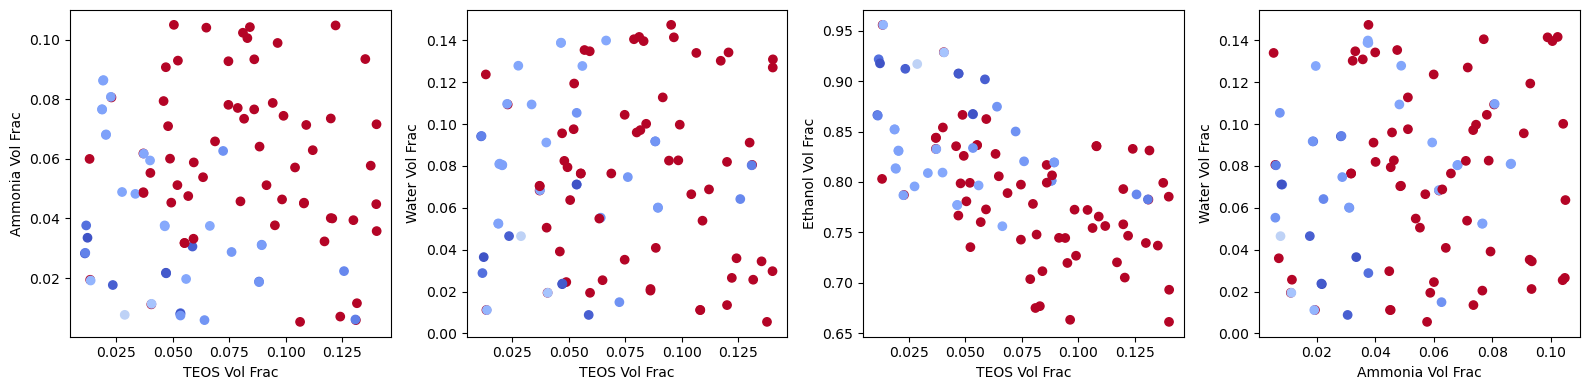

In [40]:
fig, ax = plt.subplots(1, 4, figsize = (16, 4))

ax[0].scatter(valid_synth['teos_vol_frac'], valid_synth['ammonia_vol_frac'], c = valid_synth['rmse_frac'], cmap = plt.cm.coolwarm)
ax[0].set_xlabel('TEOS Vol Frac')
ax[0].set_ylabel('Ammonia Vol Frac')

ax[1].scatter(valid_synth['teos_vol_frac'], valid_synth['water_vol_frac'], c = valid_synth['rmse_frac'], cmap = plt.cm.coolwarm)
ax[1].set_xlabel('TEOS Vol Frac')
ax[1].set_ylabel('Water Vol Frac')


ax[2].scatter(valid_synth['teos_vol_frac'], valid_synth['ethanol_vol_frac'], c = valid_synth['rmse_frac'], cmap = plt.cm.coolwarm)
ax[2].set_xlabel('TEOS Vol Frac')
ax[2].set_ylabel('Ethanol Vol Frac')

ax[3].scatter(valid_synth['ammonia_vol_frac'], valid_synth['water_vol_frac'], c = valid_synth['rmse_frac'], cmap = plt.cm.coolwarm)
ax[3].set_xlabel('Ammonia Vol Frac')
ax[3].set_ylabel('Water Vol Frac')


plt.tight_layout()



In [26]:
valid_synth['rmse_log_distance'][valid_synth['rmse_log_distance'] == 50] = 5

/tmp/ipykernel_36601/3368163178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_synth['rmse_log_distance'][valid_synth['rmse_log_distance'] == 50] = 5
/tmp/ipykernel_36601/3368163178.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_synth['rmse_log_distance'][valid_synth['rmse_log_distance'] == 50] = 5


In [27]:
valid_synth['rmse_frac'] = (valid_synth['rmse_log_distance'] - valid_synth['rmse_log_distance'].min())/(valid_synth['rmse_log_distance'].max() - valid_synth['rmse_log_distance'].min())

/tmp/ipykernel_36601/2294372410.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid_synth['rmse_frac'] = (valid_synth['rmse_log_distance'] - valid_synth['rmse_log_distance'].min())/(valid_synth['rmse_log_distance'].max() - valid_synth['rmse_log_distance'].min())


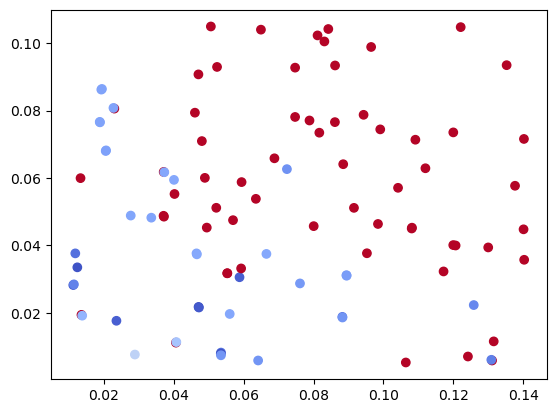

In [33]:
plt.scatter(valid_synth['teos_vol_frac'], valid_synth['ammonia_vol_frac'], c = valid_synth['rmse_frac'], cmap = plt.cm.coolwarm)

In [30]:
valid_synth['rmse_frac'].min()

0.0

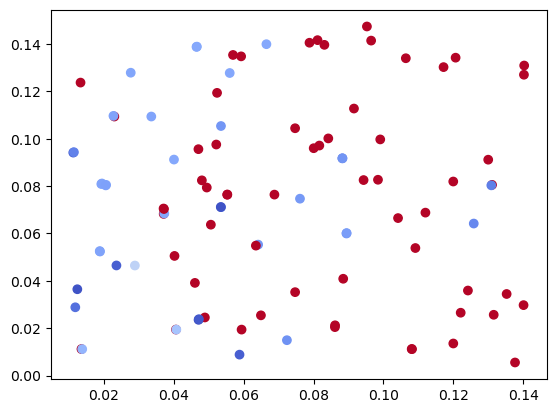

In [34]:
plt.

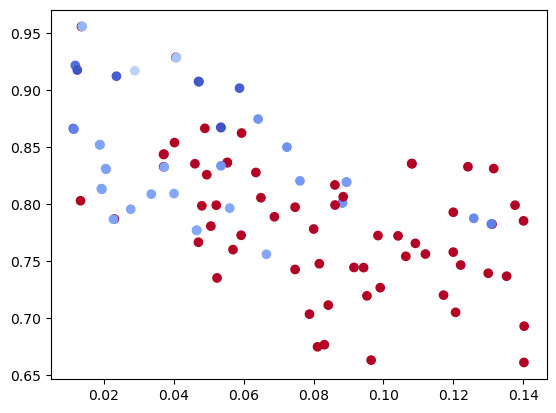

In [35]:
plt.scatter(valid_synth['teos_vol_frac'], valid_synth['ethanol_vol_frac'], c = valid_synth['rmse_frac'], cmap = plt.cm.coolwarm)

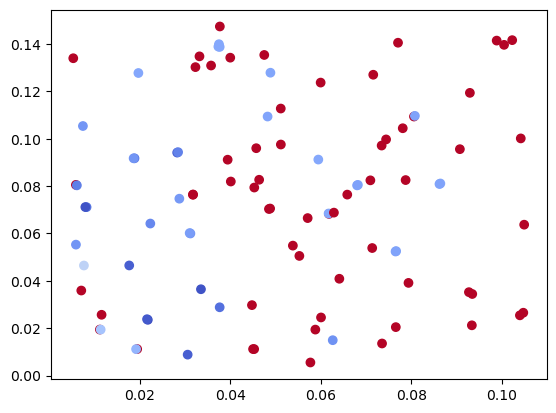

In [36]:
plt.scatter(valid_synth['ammonia_vol_frac'], valid_synth['water_vol_frac'], c = valid_synth['rmse_frac'], cmap = plt.cm.coolwarm)